# How well do jobs and skills pay for Data Analysts?
## Methology
 1- Evaluate median salary for top 6 data jobs.

 2- Find median salary per skill for Data Analysts.

 3- Visualize for highest paying skills and most demanded skills.

In [26]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns 
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Preprocessing
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Found cached dataset csv (C:/Users/islam/.cache/huggingface/datasets/lukebarousse___csv/lukebarousse--data_jobs-20095235c13fb98d/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
# Filtering Data for USA
df_USA = df[df['job_country'] == 'United States']

### Evaluating Median Salaries for top 6 Data jobs in the USA 

In [28]:
# Creating a list of top 6 job titles in the USA
df_us_jobs = df_USA['job_title_short'].value_counts().index[:6].to_list()
df_top6 = df_USA[df_USA['job_title_short'].isin(df_us_jobs)]

# Order job titles by median salary
job_order = df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

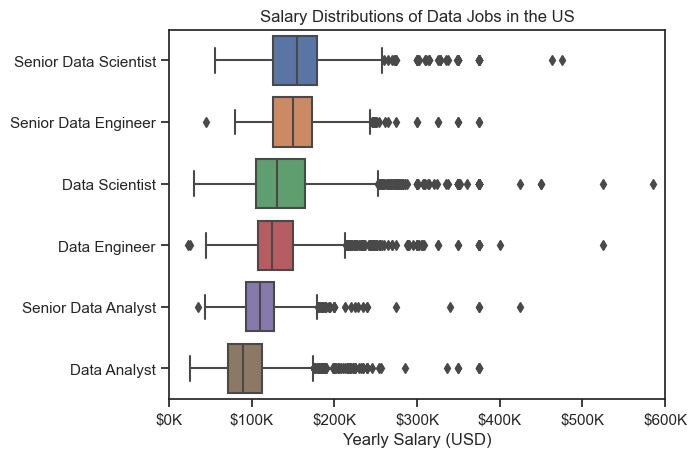

In [29]:
# Now plotting the data
sns.boxplot(data=df_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [32]:
# Investigating median salaries vs skills for Data Analysts in the USA
df_analyst = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Removign the NaN values in median salary for accurate visualization
df_analyst = df_analyst.dropna(subset=['salary_year_avg'])

# Exploding the job skills list to have one skill per row
df_analyst = df_analyst.explode('job_skills')

df_analyst[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


### Determining the Highest paid skills and Most Demanded Skills

In [33]:
df_DA_top_pay = df_analyst.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [48]:
# Determining the Most Demanded Skills
df_DA_top_demand = df_analyst.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_top_demand = df_DA_top_demand.head(10).sort_values(by='median', ascending=False)
df_DA_top_demand

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


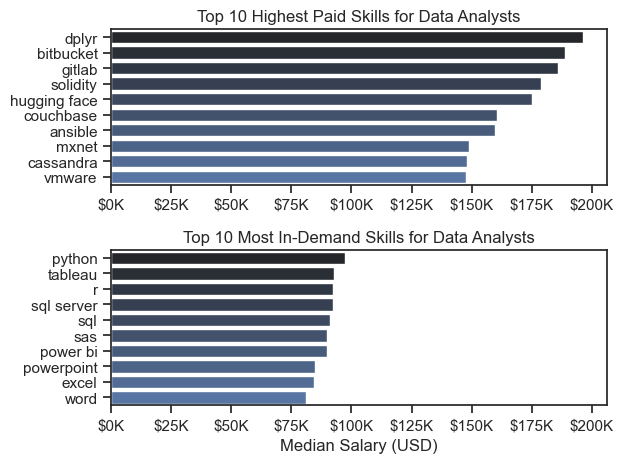

In [51]:
### Determining the Highest paid skills and Most Demanded Skills
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], palette="dark:b")
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()


# Top 10 Most In-Demand Skills for Data Analysts
#df_DA_top_demand[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_top_demand, x='median', y=df_DA_top_demand.index, ax=ax[1], palette="dark:b")
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()

plt.tight_layout()
plt.show()